Ce TP a été réalisé en binôme par NDIAYE Maïrame et VED Olesia en M2 IASD en apprentissage. 

# Value Iteration & Policy Iteration

On va utiliser l'exemple du monde grille simple. 

![Grid World](https://www.lamsade.dauphine.fr/~airiau/Teaching/M2-IASDapp-RL/gridworld.png)



On va numéroter les états comme suit:

| 7 | 8 | 9 | 10 |
|---|---|----|---|
| **4** |  - | **5** | **6**  |
| **0** | **1** | **2** | **3**  |

Les états finaux sont donc les états 6 et 10.

On a 4 actions disponibles, on les encode de la façon suivante:
* $\uparrow$: 0 
* $\leftarrow$ : 1
* $\downarrow$: 2
* $\rightarrow$ : 3

Ci-dessous, on a entré pour vous la matrice de transition $T$ et la matrice de récompense $R$. Ainsi $T[s_1,a,s_2]$ donne la probabilité d'atteindre l'état $s_2$ en ayant pris l'action $a$ dans l'état $s_1$ et $R[s,a]$ donne la récompense immédiate reçue après avoir pris l'action $a$ dans l'état $s$.

Vous pouvez facilement changer la pénalité pour avancer d'une case en changeant la valeur de la variable `penalty` ci-dessous.

Ce n'est peut-être pas la manière la plus élégante, mais cela suffira pour l'exercice!



In [158]:
import numpy as np
import matplotlib.pyplot as plt


l=0.8
s = 0.1
v_win = 1
v_lose = -1

T = np.zeros((11, 4, 11))
#UP

T[0,0,:]=[s, s, 0, 0, l, 0, 0, 0, 0, 0, 0 ] 
T[1,0,:]=[s, l, s, 0, 0, 0, 0, 0, 0, 0, 0 ]
T[2,0,:]=[0, s, 0, s, 0, l, 0, 0, 0, 0, 0 ]
T[3,0,:]=[0, 0, s, s, 0, 0, l, 0, 0, 0, 0 ]
T[4,0,:]=[0, 0, 0, 0, 2*s, 0, 0, l, 0, 0, 0 ]
T[5,0,:]=[0, 0, 0, 0, 0, s, s, 0, 0, l, 0 ]
T[6,0,:]=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 ]
T[7,0,:]=[0, 0, 0, 0, 0, 0, 0, s+l, s, 0, 0 ]
T[8,0,:]=[0, 0, 0, 0, 0, 0, 0, s, l, s, 0 ]
T[9,0,:]=[0, 0, 0, 0, 0, 0, 0, 0, s, l, s ]
T[10,0,:]=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0 ]
#LEFT
T[0,1,:]=[s+l, 0, 0, 0, s, 0, 0, 0, 0, 0, 0 ] 
T[1,1,:]=[l, 2*s, 0, 0, 0, 0, 0, 0, 0, 0, 0 ]
T[2,1,:]=[0, l, s, 0, 0, s, 0, 0, 0, 0, 0 ]
T[3,1,:]=[0, 0, l, s, 0, 0, s, 0, 0, 0, 0 ]
T[4,1,:]=[s, 0, 0, 0, l, 0, 0, s, 0, 0, 0 ]
T[5,1,:]=[0, 0, s, 0, 0, l, 0, 0, 0, s, 0 ]
T[6,1,:]=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 ]
T[7,1,:]=[0, 0, 0, 0, s, 0, 0, s+l, 0, 0, 0 ]
T[8,1,:]=[0, 0, 0, 0, 0, 0, 0, l, 2*s, 0, 0 ]
T[9,1,:]=[0, 0, 0, 0, 0, s, 0, 0, l, s, 0 ]
T[10,1,:]=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0 ]
# DOWN
T[0,2,:]=[s+l, s, 0, 0, 0, 0, 0, 0, 0, 0, 0 ] 
T[1,2,:]=[s, l, s, 0, 0, 0, 0, 0, 0, 0, 0 ]
T[2,2,:]=[0, s, l, s, 0, 0, 0, 0, 0, 0, 0 ]
T[3,2,:]=[0, 0, s, l+s, 0, 0, 0, 0, 0, 0, 0 ]
T[4,2,:]=[l, 0, 0, 0, 2*s, 0, 0, 0, 0, 0, 0 ]
T[5,2,:]=[0, 0, l, 0, 0, s, s, 0, 0, 0, 0 ]
T[6,2,:]=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 ]
T[7,2,:]=[0, 0, 0, 0, l, 0, 0, s, s, 0, 0 ]
T[8,2,:]=[0, 0, 0, 0, 0, 0, 0, s, l, s, 0 ]
T[9,2,:]=[0, 0, 0, 0, 0, 0, 0, 0, s, l, s ]
T[10,2,:]=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0 ]
#RIGHT
T[0,3,:]=[s, l, 0, 0, s, 0, 0, 0, 0, 0, 0 ] 
T[1,3,:]=[0, 2*s, l, 0, 0, 0, 0, 0, 0, 0, 0 ]
T[2,3,:]=[0, 0, s, l, 0, s, 0, 0, 0, 0, 0 ]
T[3,3,:]=[0, 0, 0, s+l, 0, 0, s, 0, 0, 0, 0 ]
T[4,3,:]=[s, 0, 0, 0, l, 0, 0, s, 0, 0, 0 ]
T[5,3,:]=[0, 0, s, 0, 0, 0, l, 0, 0, s, 0 ]
T[6,3,:]=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 ]
T[7,3,:]=[0, 0, 0, 0, s, 0, 0, s, l, 0, 0 ]
T[8,3,:]=[0, 0, 0, 0, 0, 0, 0, 0, 2*s, l, 0 ]
T[9,3,:]=[0, 0, 0, 0, 0, s, 0, 0, 0, s, l ]
T[10,3,:]=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0 ]

penalty= 0.00
R = penalty*np.ones((11,4))
R[10,:]= np.ones(4)*v_win
R[6,:]= np.ones(4)*v_lose

print("Matrice de Transition : ")
print(T)
print("")
print("Vecteur de récompenses : ")
print(R)


Matrice de Transition : 
[[[0.1 0.1 0.  0.  0.8 0.  0.  0.  0.  0.  0. ]
  [0.9 0.  0.  0.  0.1 0.  0.  0.  0.  0.  0. ]
  [0.9 0.1 0.  0.  0.  0.  0.  0.  0.  0.  0. ]
  [0.1 0.8 0.  0.  0.1 0.  0.  0.  0.  0.  0. ]]

 [[0.1 0.8 0.1 0.  0.  0.  0.  0.  0.  0.  0. ]
  [0.8 0.2 0.  0.  0.  0.  0.  0.  0.  0.  0. ]
  [0.1 0.8 0.1 0.  0.  0.  0.  0.  0.  0.  0. ]
  [0.  0.2 0.8 0.  0.  0.  0.  0.  0.  0.  0. ]]

 [[0.  0.1 0.  0.1 0.  0.8 0.  0.  0.  0.  0. ]
  [0.  0.8 0.1 0.  0.  0.1 0.  0.  0.  0.  0. ]
  [0.  0.1 0.8 0.1 0.  0.  0.  0.  0.  0.  0. ]
  [0.  0.  0.1 0.8 0.  0.1 0.  0.  0.  0.  0. ]]

 [[0.  0.  0.1 0.1 0.  0.  0.8 0.  0.  0.  0. ]
  [0.  0.  0.8 0.1 0.  0.  0.1 0.  0.  0.  0. ]
  [0.  0.  0.1 0.9 0.  0.  0.  0.  0.  0.  0. ]
  [0.  0.  0.  0.9 0.  0.  0.1 0.  0.  0.  0. ]]

 [[0.  0.  0.  0.  0.2 0.  0.  0.8 0.  0.  0. ]
  [0.1 0.  0.  0.  0.8 0.  0.  0.1 0.  0.  0. ]
  [0.8 0.  0.  0.  0.2 0.  0.  0.  0.  0.  0. ]
  [0.1 0.  0.  0.  0.8 0.  0.  0.1 0.  0.  0. ]]

 [[0.

## Value Iteration
Implémentez l'algorithme d'itération sur les valeurs. Pour ce faire, implémentez une fonction qui prend en paramètre:
* $\epsilon$ le paramètre pour le test d'arrêt (dans un premier temps, vous pouvez remplacer ce paramètre par un nombre d'itérations maximal, comme dans l'appel ci-dessou)
* $\gamma$ le taux d'escompte (i.e. la valeur à l'instant t d'obtenir une unité de récompense à l'instant t+1)
* $T$ la matrice de transition
* $R$ la matrice de récompense

La méthode retourne le vecteur $v: S \rightarrow {\mathbb R}$ qui associe à chaque état la valeur optimale de cet état.

La fonction $printV$ ci-dessous affichera les valeurs de $v$ pour le problème du gridworld.

Vous pourrez ainsi tester si vous retrouvez les valeurs de l'exemple montré en cours. 

In [159]:
def valueIteration(nbIterations: int, gamma: float, T, R):
    v = [0]*11
    
    for k in range(nbIterations):
        for i in range(11):
            v[i] = max_action(i,gamma,R, T, v)
    return(v)

#Fonction qui determine l'action qui maximise  

def max_action(state:int,gamma:float, R, T, V):
    liste_valeurs = [0]*4 #on va stocker la valeur que nous apporte chaque action
    for i in range(4):
        somme_valeur = 0
        for j in range(11):
            somme_valeur = somme_valeur + ((T[state][i][j])*V[j])
        liste_valeurs[i] = R[state][i] + gamma*somme_valeur
    return(max(liste_valeurs))

In [160]:
def printV(v):
  print('| {:03.2f} | {:03.2f} | {:03.2f} | {:03.2f} |'.format(v[7], v[8], v[9], v[10]))
  print('| {:03.2f} | ---- | {:03.2f} | {:03.1f} |'.format(v[4], v[5], v[6]))
  print('| {:03.2f} | {:03.2f} | {:03.2f} | {:03.2f} |'.format(v[0], v[1], v[2], v[3]))
  

In [161]:
w = valueIteration(100, 0.9, T, R)
printV(w)

| 0.64 | 0.74 | 0.85 | 1.00 |
| 0.57 | ---- | 0.57 | -1.0 |
| 0.49 | 0.43 | 0.48 | 0.28 |


In [162]:
# plot the best policy given the value function v:
# i.e. plot the best action for each state given the value function v.

def plotBestPolicy(v, gamma):
  bestV=np.zeros(11)
  bestA=np.zeros(11)
  fig, ax = plt.subplots()
  # policy extraction
  for s1 in range(11):
    val=[]
    for a in range(4):
      va=0
      for s2 in range(11):
        va += T[s1,a,s2]*v[s2]
      val= val+[ R[s1,a]+gamma*va ]
    bestV[s1]=np.max(val)
    bestA[s1]=np.argmax(val)

    matV= np.array( [[bestV[7], bestV[8], bestV[9], bestV[10]],
                    [bestV[4],   -1 , bestV[5], bestV[6]],
                    [bestV[0], bestV[1], bestV[2], bestV[3]]]
                    )
    matA = np.array([
                    [bestA[7], bestA[8], bestA[9], -1],
                    [bestA[4],   -1 , bestA[5], -1],
                    [bestA[0], bestA[1], bestA[2], bestA[3]]])

    im = ax.imshow(matV)


  for i in range(matV.shape[0]):
      for j in range(matV.shape[1]):
          if matA[i][j]==-1:
              arrow = ''
          elif matA[i, j] == 0:
              arrow = '^'
          elif matA[i, j] == 1:
              arrow = '<'
          elif matA[i, j] == 2:
              arrow = 'v'
          elif matA[i, j] == 3:
              arrow = '>'
          text = ax.text(j, i, arrow, ha = "center", va = "center",
                         color = "black")
            
  cbar = ax.figure.colorbar(im, ax = ax)
    
  fig.tight_layout()
  plt.show() 

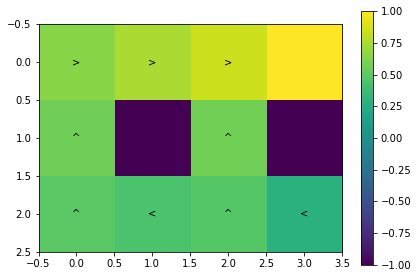

In [163]:
plotBestPolicy(w, 0.9)

Vous pouvez modifier la matrice de récompenses pour observer les différentes politiques optimales vues en cours. Peut-être en avons nous oublié?


## Policy Iteration

Implémentez l'algorithme d'itération sur les politiques. Pour débugger, vous pouvez dessiner la politique avec les fonctions ci-dessus (pour voir la fonction de valeur et/ou la politique associée).


In [164]:
#Itération sur les politiques 

#Fonctions utiles 

def construct_Tpi(politique,T): #Construit la matrice de transitions
    Tpi = np.zeros((11,11))
    for s1 in range(11):
        for s2 in range(11):
            somme = 0
            for p in range(4):
                somme = somme + politique[s1,p]*T[s1,p,s2]
            Tpi[s1,s2] = somme
    return(Tpi)


def construct_Rpi(politique,R): #Construit la matrice de récompenses
    Rpi = np.zeros(11)
    for s1 in range(11):
        somme = 0
        for p in range(4):
            somme = somme +politique[s1,p]*R[s1,p]
        
        Rpi[s1] = somme
    return(Rpi)

def construct_Qpi(Vpi,T,R,gamma,s1): #Construit Q
    Qpi = np.zeros(4)
    for a in range(4):
        somme = 0
        for s2 in range(11):
            somme = somme+T[s1,a,s2]*Vpi[s2]
        Qpi[a] = R[s1,a] + gamma*somme
    return(Qpi)


In [165]:
def politiqueIteration(gamma: float, T, R, politique):
    Tpi = construct_Tpi(politique,T)
    Rpi = construct_Rpi(politique,R)
    I = np.identity(11)
    Vpi = np.linalg.inv(I-0.9*Tpi).dot(Rpi)
    
    while(True):
        prec_Vpi = Vpi.copy() #On stocke une copie des anciennes valeurs
        
        for s1 in range(11):
            Qpi = construct_Qpi(prec_Vpi,T,R,gamma,s1)
            maxi = Qpi[0]
            arg_maxi = 0
            improved = False

            for a in range(4):
                if(Qpi[a]>prec_Vpi[s1]):
                    improved = True
                    if(Qpi[a]>maxi):
                        maxi = Qpi[a]
                        arg_maxi = a
            if(improved==True):
                politique[s1] = 0
                politique[s1,arg_maxi] = 1
        
        Tpi = construct_Tpi(politique,T)
        Rpi = construct_Rpi(politique,R)
        I = np.identity(11)
        Vpi = np.linalg.inv(I-0.9*Tpi).dot(Rpi)
        
        if((Vpi==prec_Vpi).all()):
            print("Politique trouvée : ")
            print(politique)
            print("")
            print("Valeurs trouvées : ")
            print(Vpi)
            break
    
    return(Vpi)
         

In [166]:
politique_init = np.zeros((11,4))
politique_init[0,2]= 1
politique_init[1,0]= 1
politique_init[2,0]= 1
politique_init[3,0]= 1
politique_init[4,0]= 1
politique_init[5,2]= 1
politique_init[6,0]= 1
politique_init[7,3]= 1
politique_init[8,3]= 1
politique_init[9,3]= 1
politique_init[10,0]= 1

print("Politique initiale : ")
print(politique_init)
print("")

Vpi = politiqueIteration(0.9,T,R,politique_init)

Politique initiale : 
[[0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]

Politique trouvée : 
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]

Valeurs trouvées : 
[ 0.49068396  0.43084446  0.47547113  0.27729584  0.56631445  0.57185903
 -1.          0.64496924  0.74438015  0.84776628  1.        ]


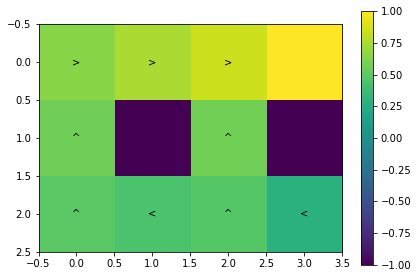

In [167]:
plotBestPolicy(Vpi, 0.9)

Ainsi, dans ce TP, nous avons implementé les deux algorithmes vus en cours sur la programmation dynamiques. Les fonctions de valeurs renvoyés par les deux algorithmes sont bien les mêmes et correspondent bien aux résultats dans l'exemple du cours. 